# üìñ ÌååÏù¥Ïç¨ ÌÅ¥ÎûòÏä§(Class) Ïã§Ïäµ: MRI ÏΩîÏùº ÏïïÏ∂ï

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏùò Î™©ÌëúÎäî Ïã§Ï†úÏôÄ Ïú†ÏÇ¨Ìïú MRI Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ Í≥ºÏ†ïÏóê **ÌååÏù¥Ïç¨ ÌÅ¥ÎûòÏä§**Î•º Ï†ÅÏö©Ìï¥Î≥¥Îäî Í≤ÉÏûÖÎãàÎã§. `GCCCompressor`ÎùºÎäî ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©ÌïòÏó¨ MRI ÏΩîÏùº Îç∞Ïù¥ÌÑ∞Î•º ÏïïÏ∂ïÌïòÍ≥†, Í∑∏ Í≤∞Í≥ºÎ•º Ïù¥ÎØ∏ÏßÄÎ°ú Ïû¨Íµ¨ÏÑ±ÌïòÏó¨ ÏãúÍ∞ÅÌôîÌïòÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Îã®Í≥ÑÎ≥ÑÎ°ú Ïã§ÏäµÌï©ÎãàÎã§.

### ÌïôÏäµ Î™©Ìëú
1.  ÌÅ¥ÎûòÏä§Í∞Ä Ïôú ÌïÑÏöîÌïúÏßÄ Ïù¥Ìï¥Ìï©ÎãàÎã§.
2.  ÌÅ¥ÎûòÏä§Ïùò Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÏÉùÏÑ±(`__init__`)ÌïòÍ≥†, Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌïòÎäî Î∞©Î≤ïÏùÑ ÏùµÌûôÎãàÎã§.
3.  Î≥µÏû°Ìïú Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ ÌååÏù¥ÌîÑÎùºÏù∏(ÏïïÏ∂ï ‚Üí Ïû¨Íµ¨ÏÑ± ‚Üí ÏãúÍ∞ÅÌôî)ÏùÑ Íµ¨ÏÑ±ÌïòÎäî Î∞©Î≤ïÏùÑ Î∞∞ÏõÅÎãàÎã§.

---

## 1: ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
Î®ºÏ†Ä, Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨ÏôÄ ÏãúÍ∞ÅÌôîÏóê ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.

In [4]:
import numpy as np
import numpy.fft as fft
import h5py
import os
from tqdm.notebook import tqdm  # Ï£ºÌîºÌÑ∞ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî tqdm.notebookÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏäµÎãàÎã§.
import matplotlib.pyplot as plt

import sys
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

from utils.data.transforms import GCCCompressor

# ÏãúÍ∞ÅÌôî Ïä§ÌÉÄÏùº ÏÑ§Ï†ï
plt.style.use('dark_background')

## 2: Í≤ΩÎ°ú Î∞è ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÍ≥† Ï†ÄÏû•Ìï† Í≤ΩÎ°úÏôÄ, ÏïïÏ∂ï Í≥ºÏ†ïÏóê ÏÇ¨Ïö©Îê† Ïó¨Îü¨ ÌååÎùºÎØ∏ÌÑ∞(ÏÑ§Ï†ïÍ∞í)Îì§ÏùÑ ÎØ∏Î¶¨ Î≥ÄÏàòÎ°ú Ï†ïÏùòÌï©ÎãàÎã§. Ïù¥Î†áÍ≤å ÌïòÎ©¥ ÎÇòÏ§ëÏóê ÏÑ§Ï†ïÏùÑ Î≥ÄÍ≤ΩÌïòÍ∏∞Í∞Ä Îß§Ïö∞ Ìé∏Î¶¨Ìï©ÎãàÎã§.

In [7]:
# --- ÎîîÎ†âÌÜ†Î¶¨ Í≤ΩÎ°ú ÏÑ§Ï†ï ---
# Ïù¥ ÎÖ∏Ìä∏Î∂Å ÌååÏùºÏù¥ ÏûàÎäî ÏúÑÏπòÏóê data Ìè¥ÎçîÎ•º ÎßåÎì§Ïñ¥ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
INPUT_DIR = '/Users/sinjeongmin/Desktop/25-3/Î∞ïÏÉÅÏõê/data1/val/kspace1'
COMPRESSED_DIR = '/Users/sinjeongmin/Desktop/25-3/Î∞ïÏÉÅÏõê/data1/val/kspace_compressed'
RECON_DIR = '/Users/sinjeongmin/Desktop/25-3/Î∞ïÏÉÅÏõê/data1/val/kspace_reconstructed'

# Ìè¥ÎçîÍ∞Ä ÏóÜÏúºÎ©¥ ÏûêÎèôÏúºÎ°ú ÏÉùÏÑ±Ìï©ÎãàÎã§.
os.makedirs(INPUT_DIR, exist_ok=True)
os.makedirs(COMPRESSED_DIR, exist_ok=True)
os.makedirs(RECON_DIR, exist_ok=True)

# --- HDF5 ÌååÏùº ÎÇ¥ Îç∞Ïù¥ÌÑ∞ÏÖã Ïù¥Î¶Ñ ---
KSPACE_DATASET_NAME = 'kspace'

# --- ÏïïÏ∂ï Í¥ÄÎ†® ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ---
TARGET_COILS = 4       # ÏïïÏ∂ï ÌõÑ Î™©Ìëú Í∞ÄÏÉÅ ÏΩîÏùº Ïàò (Í∞íÏùÑ Î∞îÍøîÎ≥¥ÏÑ∏Ïöî!)
NUM_CALIB_LINES = 24   # k-space Ï§ëÏïôÏóêÏÑú ÏÇ¨Ïö©Ìï† Î≥¥Ï†ï Îç∞Ïù¥ÌÑ∞ ÎùºÏù∏ Ïàò
SLIDING_WINDOW_SIZE = 5 # ÏïïÏ∂ï ÌñâÎ†¨ Í≥ÑÏÇ∞ Ïãú ÏÇ¨Ïö©Ìï† Ïä¨ÎùºÏù¥Îî© ÏúàÎèÑÏö∞ ÌÅ¨Í∏∞

## 5: ÌÅ¥ÎûòÏä§ Ïù∏Ïä§ÌÑ¥Ïä§ ÏÉùÏÑ± Î∞è ÏïïÏ∂ï Ïã§Ìñâ

Ïù¥Ï†ú `GCCCompressor` ÏÑ§Í≥ÑÎèÑÎ•º Î∞îÌÉïÏúºÎ°ú Ïã§Ï†ú ÏïïÏ∂ïÍ∏∞ Í∞ùÏ≤¥(Ïù∏Ïä§ÌÑ¥Ïä§)Î•º ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§. `__init__` Î©îÏÜåÎìúÏóê Ï†ïÏùòÎêú ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Ï†ÑÎã¨ÌïòÏó¨ Ïö∞Î¶¨Í∞Ä ÏõêÌïòÎäî Î∞©ÏãùÏúºÎ°ú ÏûëÎèôÌïòÎäî ÏïïÏ∂ïÍ∏∞Î•º ÏÉùÏÑ±Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [8]:
# 1. GCCCompressor ÌÅ¥ÎûòÏä§Ïùò Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÏÉùÏÑ±Ìï©ÎãàÎã§.
#    ÏïûÏÑú ÏÑ§Ï†ïÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Ï†ÑÎã¨Ìï©ÎãàÎã§.
compressor = GCCCompressor(
    target_coils=TARGET_COILS,
    num_calib_lines=NUM_CALIB_LINES,
    sliding_window_size=SLIDING_WINDOW_SIZE,
    kspace_dataset_name=KSPACE_DATASET_NAME
)

# 2. ÏÉùÏÑ±Îêú compressor Í∞ùÏ≤¥Ïùò run Î©îÏÜåÎìúÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏïïÏ∂ïÏùÑ Ïã§ÌñâÌï©ÎãàÎã§.
compressor.run(INPUT_DIR, COMPRESSED_DIR)

GCC CompressorÍ∞Ä Îã§Ïùå ÌååÎùºÎØ∏ÌÑ∞Î°ú Ï¥àÍ∏∞ÌôîÎêòÏóàÏäµÎãàÎã§:
- Target Coils: 4
- Calibration Lines: 24
- Sliding Window Size: 5
Ï¥ù 1Í∞úÏùò ÌååÏùºÏóê ÎåÄÌï¥ ÏïïÏ∂ïÏùÑ ÏãúÏûëÌï©ÎãàÎã§...


Total Progress:   0%|          | 0/1 [00:00<?, ?it/s]

























Total Progress: 100%|##########| 1/1 [00:02<00:00,  2.61s/it]


Î™®Îì† ÌååÏùº Ï≤òÎ¶¨Í∞Ä ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.
Í≤∞Í≥ºÎäî '/Users/sinjeongmin/Desktop/25-3/Î∞ïÏÉÅÏõê/data1/val/kspace_compressed' ÎîîÎ†âÌÜ†Î¶¨Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


## 6: Ïù¥ÎØ∏ÏßÄ Ïû¨Íµ¨ÏÑ± Î∞è ÏãúÍ∞ÅÌôî

ÏïïÏ∂ïÎêú k-space Îç∞Ïù¥ÌÑ∞Îäî ÏïÑÏßÅ Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏïÑÎãôÎãàÎã§. Ïù¥Î•º ÏÇ¨ÎûåÏù¥ Î≥º Ïàò ÏûàÎäî Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Ïû¨Íµ¨ÏÑ± Í≥ºÏ†ïÏù¥ ÌïÑÏöîÌï©ÎãàÎã§. Ïó¨Í∏∞ÏÑúÎäî Í∞Å Í∞ÄÏÉÅ ÏΩîÏùºÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÎßåÎì§Ïñ¥ **RSS(Root-Sum-of-Squares)** Î∞©ÏãùÏúºÎ°ú Í≤∞Ìï©Ìï©ÎãàÎã§.

Í≤∞Í≥º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ **Aligned**ÏôÄ **Unaligned** ÏïïÏ∂ïÏùò Ï∞®Ïù¥Î•º ÏßÅÏ†ë ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.


ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ 'knee_acc8_100_gcc_hybrid.h5' ÌååÏùºÏùÑ Î°úÎìúÌï©ÎãàÎã§.


/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50517 (\N{HANGUL SYLLABLE AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from

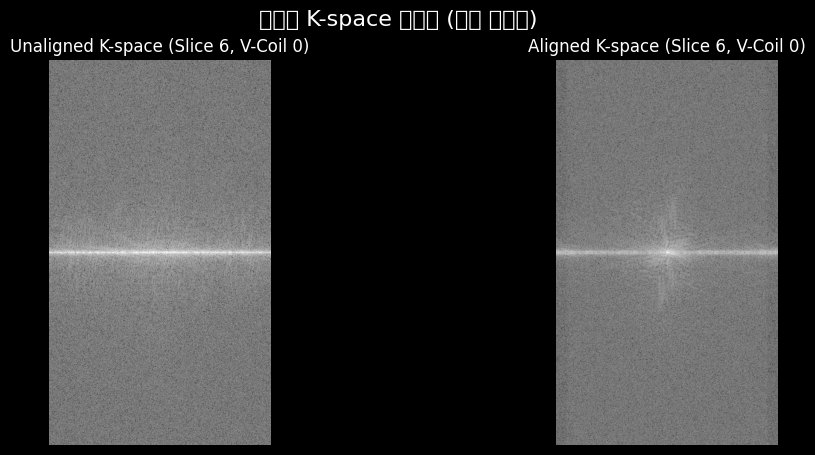


Ïû¨Íµ¨ÏÑ±ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...
Ïû¨Íµ¨ÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎ•º '/Users/sinjeongmin/Desktop/25-3/Î∞ïÏÉÅÏõê/data1/val/kspace_reconstructed/knee_acc8_100_gcc_hybrid.h5'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/fmri/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from 

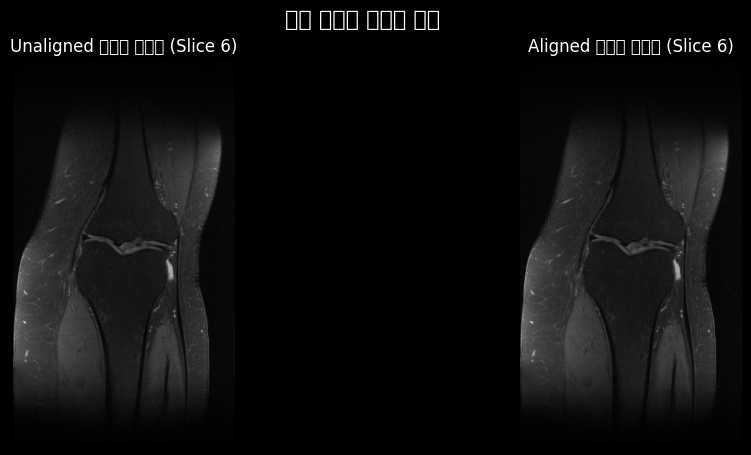

In [9]:
def rss_combine(coil_images):
    """ÏΩîÏùº Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Root-Sum-of-Squares Î∞©ÏãùÏúºÎ°ú Í≤∞Ìï©Ìï©ÎãàÎã§."""
    return np.sqrt(np.sum(np.abs(coil_images)**2, axis=0))

def reconstruct_from_kspace(kspace_4d):
    """4D K-space Îç∞Ïù¥ÌÑ∞Î•º 3D Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÌôòÌï©ÎãàÎã§."""
    n_slices, n_coils, n_pe, n_ro = kspace_4d.shape
    reconstructed_images_3d = np.zeros((n_slices, n_pe, n_ro), dtype=np.float32)
    
    for s_idx in range(n_slices):
        slice_kspace = kspace_4d[s_idx]
        coil_images = np.zeros_like(slice_kspace, dtype=np.complex128)
        for c_idx in range(n_coils):
            ifftshifted_kspace = fft.ifftshift(slice_kspace[c_idx])
            image_domain = fft.ifft2(ifftshifted_kspace)
            centered_image = fft.fftshift(image_domain)
            coil_images[c_idx] = centered_image
        reconstructed_images_3d[s_idx] = rss_combine(coil_images)
        
    return reconstructed_images_3d

def visualization_worker(compressed_dir, recon_dir):
    """ÏïïÏ∂ïÎêú ÌååÏùºÎì§ÏùÑ Ïû¨Íµ¨ÏÑ±ÌïòÍ≥† ÏãúÍ∞ÅÌôîÌïòÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Îã¥ÎãπÌï©ÎãàÎã§."""
    file_list = sorted([f for f in os.listdir(compressed_dir) if f.endswith('.h5')])
    if not file_list:
        print(f"'{compressed_dir}'Ïóê ÏïïÏ∂ïÎêú ÌååÏùºÏù¥ ÏóÜÏäµÎãàÎã§.")
        return
    
    # Ï≤´ Î≤àÏß∏ ÌååÏùºÎßå ÏãúÍ∞ÅÌôî ÎåÄÏÉÅÏúºÎ°ú ÏÑ†ÌÉù
    filename = file_list[0]
    compressed_path = os.path.join(compressed_dir, filename)
    recon_path = os.path.join(recon_dir, filename.replace('_compressed.h5', '_recon.h5'))

    with h5py.File(compressed_path, 'r') as f_in:
        print(f"\nÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ '{filename}' ÌååÏùºÏùÑ Î°úÎìúÌï©ÎãàÎã§.")
        kspace_aligned = f_in['kspace_aligned_gcc'][()]
        kspace_unaligned = f_in['kspace_gcc_unaligned'][()]

        # --- k-space ÏãúÍ∞ÅÌôî ---
        # Ï§ëÏïô Ïä¨ÎùºÏù¥Ïä§, Ï≤´ Î≤àÏß∏ Í∞ÄÏÉÅ ÏΩîÏùº ÏÑ†ÌÉù
        slice_to_show = kspace_aligned.shape[0] // 2
        coil_to_show = 0
        
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(np.log(np.abs(kspace_unaligned[slice_to_show, coil_to_show]) + 1e-9), cmap='gray')
        plt.title(f'Unaligned K-space (Slice {slice_to_show}, V-Coil {coil_to_show})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(np.log(np.abs(kspace_aligned[slice_to_show, coil_to_show]) + 1e-9), cmap='gray')
        plt.title(f'Aligned K-space (Slice {slice_to_show}, V-Coil {coil_to_show})')
        plt.axis('off')
        plt.suptitle('ÏïïÏ∂ïÎêú K-space ÏãúÍ∞ÅÌôî (Î°úÍ∑∏ Ïä§ÏºÄÏùº)', fontsize=16)
        plt.show()
        
        # --- Ïù¥ÎØ∏ÏßÄ Ïû¨Íµ¨ÏÑ± Î∞è Ï†ÄÏû• ---
        print("\nÏû¨Íµ¨ÏÑ±ÏùÑ ÏãúÏûëÌï©ÎãàÎã§...")
        recon_aligned = reconstruct_from_kspace(kspace_aligned)
        recon_unaligned = reconstruct_from_kspace(kspace_unaligned)
        
        with h5py.File(recon_path, 'w') as f_out:
            f_out.create_dataset('reconstruction_aligned', data=recon_aligned)
            f_out.create_dataset('reconstruction_unaligned', data=recon_unaligned)
        print(f"Ïû¨Íµ¨ÏÑ±Îêú Ïù¥ÎØ∏ÏßÄÎ•º '{recon_path}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

        # --- Ïû¨Íµ¨ÏÑ± Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî ---
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(recon_unaligned[slice_to_show], cmap='gray')
        plt.title(f'Unaligned Ïû¨Íµ¨ÏÑ± Ïù¥ÎØ∏ÏßÄ (Slice {slice_to_show})')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(recon_aligned[slice_to_show], cmap='gray')
        plt.title(f'Aligned Ïû¨Íµ¨ÏÑ± Ïù¥ÎØ∏ÏßÄ (Slice {slice_to_show})')
        plt.axis('off')
        plt.suptitle('ÏµúÏ¢Ö Ïû¨Íµ¨ÏÑ± Ïù¥ÎØ∏ÏßÄ ÎπÑÍµê', fontsize=16)
        plt.show()

# ÏãúÍ∞ÅÌôî Ïã§Ìñâ
visualization_worker(COMPRESSED_DIR, RECON_DIR)

## Í≤∞Î°† Î∞è Ï∂îÍ∞Ä Ïã§Ïäµ

Ï∂ïÌïòÌï©ÎãàÎã§! Ïó¨Îü¨Î∂ÑÏùÄ `GCCCompressor` ÌÅ¥ÎûòÏä§Î•º ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ MRI Îç∞Ïù¥ÌÑ∞Î•º ÏïïÏ∂ïÌïòÍ≥†, Í∑∏ Í≤∞Í≥ºÎ•º Ïù¥ÎØ∏ÏßÄÎ°ú Ïû¨Íµ¨ÏÑ± Î∞è ÏãúÍ∞ÅÌôîÌïòÎäî Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ ÏôÑÎ£åÌñàÏäµÎãàÎã§.

### Î¨¥ÏóáÏùÑ Î∞∞Ïõ†ÎÇòÏöî?
- **ÌÅ¥ÎûòÏä§ Ïù∏Ïä§ÌÑ¥Ïä§Ìôî**: `compressor = GCCCompressor(...)` ÏΩîÎìúÎ•º ÌÜµÌï¥ ÌÅ¥ÎûòÏä§ ÏÑ§Í≥ÑÎèÑÎ°úÎ∂ÄÌÑ∞ Ïã§Ï†ú Í∞ùÏ≤¥Î•º ÎßåÎìúÎäî Î∞©Î≤ïÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.
- **Î©îÏÜåÎìú Ìò∏Ï∂ú**: `compressor.run()` ÏΩîÎìúÎ•º ÌÜµÌï¥ Í∞ùÏ≤¥Í∞Ä Í∞ÄÏßÑ Í∏∞Îä•ÏùÑ Ïã§ÌñâÌïòÎäî Î∞©Î≤ïÏùÑ Î∞∞Ïõ†ÏäµÎãàÎã§.
- **ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï§ëÏöîÏÑ±**: `__init__`Ïóê Ï†ÑÎã¨ÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞Î•º Î∞îÍæ∏Î©¥ Í∞ùÏ≤¥Ïùò ÌñâÎèôÏùÑ Ï†úÏñ¥Ìï† Ïàò ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§.

### Îã§Ïùå Îã®Í≥Ñ
Ïù¥Ï†ú Ïó¨Îü¨Î∂ÑÏù¥ ÏßÅÏ†ë ÏΩîÎìúÎ•º ÏàòÏ†ïÌïòÎ©∞ Ïã§ÌóòÌï¥Î≥º Ï∞®Î°ÄÏûÖÎãàÎã§.

1.  **ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î≥ÄÍ≤Ω**: `‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 2` ÏÖÄÏóêÏÑú `TARGET_COILS` Í∞íÏùÑ `2`ÎÇò `1`Î°ú Î∞îÍøîÎ≥¥ÏÑ∏Ïöî. ÏïïÏ∂ïÎ•†Ïù¥ ÎÜíÏïÑÏßÄÎ©¥ Ïù¥ÎØ∏ÏßÄ ÌíàÏßàÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌïòÎäîÏßÄ Í¥ÄÏ∞∞Ìï¥Î≥¥ÏÑ∏Ïöî.
2.  **Îã§Î•∏ Ïä¨ÎùºÏù¥Ïä§ ÏãúÍ∞ÅÌôî**: `‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà 6`Ïùò `visualization_worker` Ìï®ÏàòÏóêÏÑú `slice_to_show` Í∞íÏùÑ `0`Ïù¥ÎÇò `2`Î°ú Î∞îÍøîÏÑú Îã§Î•∏ Ïä¨ÎùºÏù¥Ïä§Ïùò Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥¥ÏÑ∏Ïöî.